In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Python SQL toolkit and Object Relational Mapper
from sqlalchemy import create_engine

In [2]:
engine = create_engine('postgres://postgres@localhost:5432/employee_db')
conn = engine.connect()

In [3]:
# Query All Records in the Salaries Table
salaries = pd.read_sql("SELECT * FROM salaries", conn)
salaries.head()

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10002,65828,1996-08-03,1997-08-03
2,10003,40006,1995-12-03,1996-12-02
3,10004,40054,1986-12-01,1987-12-01
4,10005,78228,1989-09-12,1990-09-12


In [4]:
# Query All Records in the Titles Table
titles = pd.read_sql("SELECT * FROM titles", conn)
titles.head()

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


In [5]:
# Merging data
merged_data = pd.merge(titles, salaries, how='inner')
merged_data.head()

,emp_no,title,from_date,to_date,salary
0,10015,Senior Staff,1992-09-19,1993-08-22,40000
1,10073,Engineer,1998-02-02,1998-02-22,56473
2,10082,Staff,1990-01-03,1990-01-15,48935
3,10131,Engineer,1999-09-17,1999-12-06,48475
4,10186,Staff,1996-12-25,1997-08-16,40000


In [6]:
title_salaries = merged_data.groupby('title')['salary'].mean().reset_index()
title_salaries.head()

,title,salary
0,Assistant Engineer,48362.318078
1,Engineer,48765.865124
2,Senior Engineer,48925.505646
3,Senior Staff,57956.352697
4,Staff,58083.046735


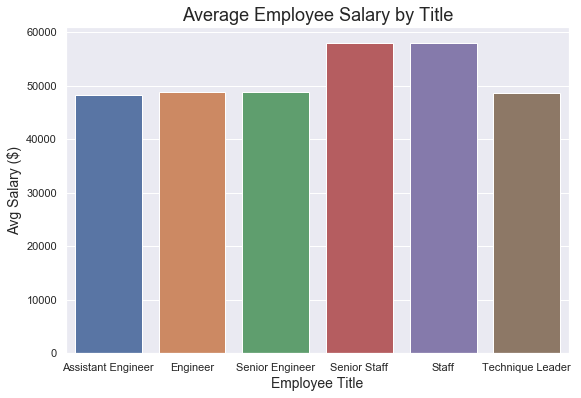

In [10]:
# Plotting the average salaries for each title
fig, ax = plt.subplots(figsize=(9,6))
sns.set_style("dark")
x_values = title_salaries['title']
y_values = title_salaries['salary']
ax = sns.barplot(x_values, y_values, data=title_salaries)

ax.set_title('Average Employee Salary by Title', fontsize=18)
ax.set_xlabel('Employee Title', fontsize=14)
ax.set_ylabel('Avg Salary ($)', fontsize=14)

plt.savefig("Figures/average_salary_by_title.png", dpi=300)